## Title: (just an example) "Target Profile of Players Who Contribute the Most Data"
### Introduction:
* provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
* clearly state the question you tried to answer with your project
* identify and fully describe the dataset that was used to answer the question

Analyzing data from minecraft users...
QUESTION 2.

### Methods & Results:
* describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
    * loads data 
    * wrangles and cleans the data to the format necessary for the planned analysis
    * performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    * creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    * performs the data analysis
    * creates a visualization of the analysis
       
* note: all figures should have a figure number and a legend
### Discussion:
* summarize what you found
* discuss whether this is what you expected to find
* discuss what impact could such findings have
* discuss what future questions could this lead to
### References
* You may include references if necessary, as long as they all have a consistent citation style.

In [22]:
### Run this cell before continuing.
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(repr)
library(GGally)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.


Attaching package: ‘tidyclust’


The following objects are masked from ‘package:parsnip’:

    knit_engine_docs, list_md_problems


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



#### Read the Datasets from URLs

In [3]:
players_data <- read_csv("https://raw.githubusercontent.com/wojpc/dsci100-project-008-group09/refs/heads/main/Data/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/wojpc/dsci100-project-008-group09/refs/heads/main/Data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(players_data)
head(sessions_data)

experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
6 Amateur     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
6 f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977  0.0        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21 
6 Adrian    Female 17

hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
  start_time       end_time         original_start_time original_end_time
1 30/06/2024 18:12 30/06/2024 18:24 1.71977e+12         1.71977e+12      
2 17/06/2024 23:33 17/06/2024 23:46 1.71867e+12         1.71867e+12      
3 25/07/2024 17:34 25/07/2024 17:57 1.72193e+12         1.72193e+12      
4 25/07/2024 03:22 25/07/2024 03:58 1.72188e+12         1.72188e+12      
5 25/05/2024 16:01 25/05/2024 16:12 1.71665e+12         1.71665e+12      
6 23/06/2024 15:08 23/06/2024 17:10 1.71916e+12         1.71916e+12

#### Left Join Data on Hashed Email and Wrangle Time
A new column called session_time is added to show elapsed time of session and times are converted from strings to more usable data. Sessions data is now combined with player information. original_start_time and original_end_time were useless so I removed them to make the table tidier and less redundant. 

In [13]:
sessions_players_joined <- sessions_data |>
  left_join(players_data, by = "hashedEmail")

sessions_players_elapsed <- sessions_players_joined |>
    mutate(end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"),
           start_time =  as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
    mutate(session_time_elapsed = as.numeric(end_time - start_time)) |>
    select(-hashedEmail, -original_start_time, -original_end_time)

head(sessions_players_elapsed)

hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
  start_time       end_time         original_start_time original_end_time
1 30/06/2024 18:12 30/06/2024 18:24 1.71977e+12         1.71977e+12      
2 17/06/2024 23:33 17/06/2024 23:46 1.71867e+12         1.71867e+12      
3 25/07/2024 17:34 25/07/2024 17:57 1.72193e+12         1.72193e+12      
4 25/07/2024 03:22 25/07/2024 03:58 1.72188e+12         1.72188e+12      
5 25/05/2024 16:01 25/05/2024 16:12 1.71665e+12         1.71665e+12      
6 23/06/2024 15:08 23/06/2024 17:10 1.71916e+12         1.71916e+12      
  experience subscribe played_hours name    gender Age
1 Regular    TRUE      223.1        Hiroshi Male   17 
2 Amateur    TRUE       53.9        Alex    Male   17 
3 Amateur    TRUE      150.0        Delara  Female 16 
4 Regular    TRUE      223.1        Hiroshi Male   17 
5 Amateur    TRUE       53.9        Alex    Male   17 
6 Regular    TRUE      223.1        Hiroshi Male   17

start_time          end_time            experience subscribe played_hours
1 2024-06-30 18:12:00 2024-06-30 18:24:00 Regular    TRUE      223.1       
2 2024-06-17 23:33:00 2024-06-17 23:46:00 Amateur    TRUE       53.9       
3 2024-07-25 17:34:00 2024-07-25 17:57:00 Amateur    TRUE      150.0       
4 2024-07-25 03:22:00 2024-07-25 03:58:00 Regular    TRUE      223.1       
5 2024-05-25 16:01:00 2024-05-25 16:12:00 Amateur    TRUE       53.9       
6 2024-06-23 15:08:00 2024-06-23 17:10:00 Regular    TRUE      223.1       
  name    gender Age session_time_elapsed
1 Hiroshi Male   17   12                 
2 Alex    Male   17   13                 
3 Delara  Female 16   23                 
4 Hiroshi Male   17   36                 
5 Alex    Male   17   11                 
6 Hiroshi Male   17  122

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


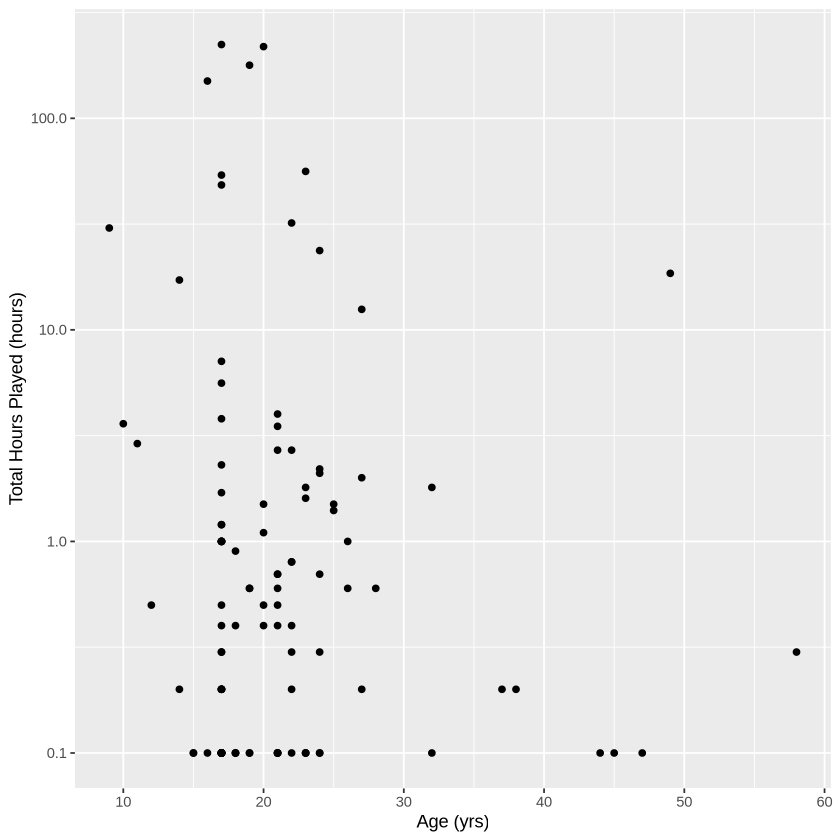

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 4 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


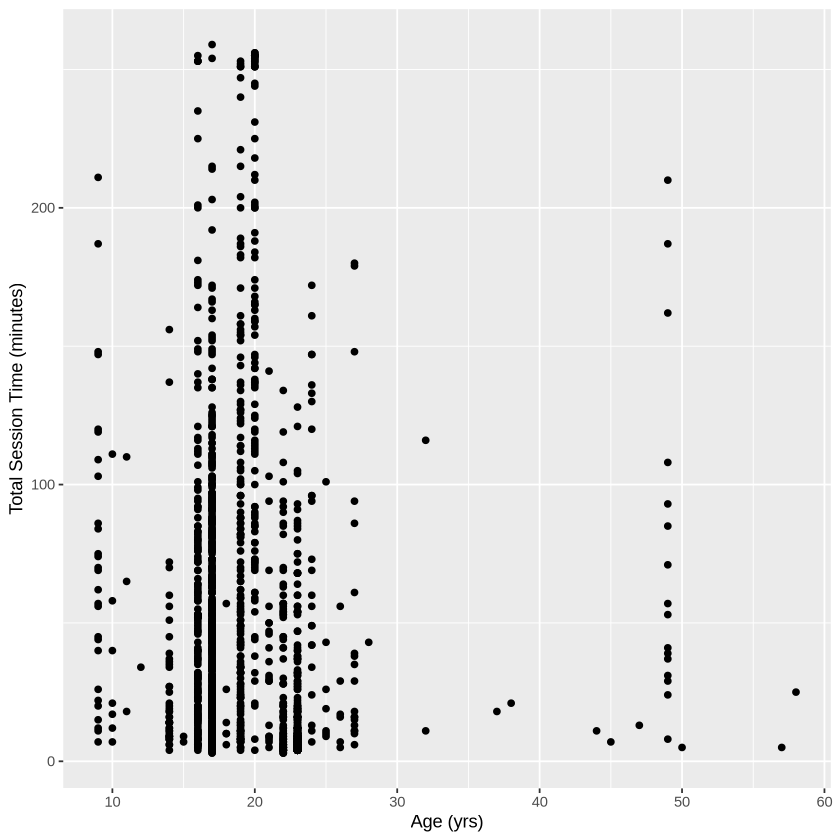

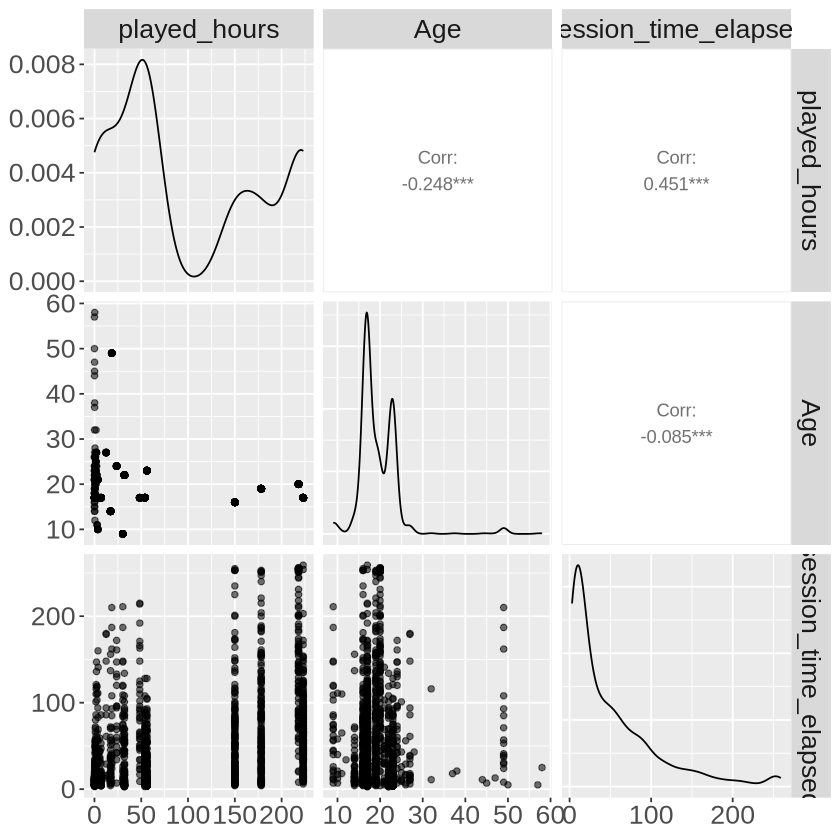

In [68]:
options(repr.plot.width = 7, repr.plot.height = 7)

players_data1 <- filter(players_data, played_hours > 0)
age_vs_hours <- ggplot(players_data1, aes(x = Age, y = played_hours)) +
        geom_point() +
        labs(x = "Age (yrs)",
             y = "Total Hours Played (hours)") +
        scale_y_log10()

sessions_players_elapsed1 <- filter(sessions_players_elapsed, session_time_elapsed > 0)
age_vs_sesstime <- ggplot(sessions_players_elapsed1, aes(x = Age, y = session_time_elapsed)) +
        geom_point() +
        labs(x = "Age (yrs)",
             y = "Total Session Time (minutes)")

player_pairs <- sessions_players_elapsed |> select(played_hours, Age, session_time_elapsed) |>
    ggpairs(aes(alpha = 0.05)) +
    theme(text = element_text(size = 20)) 
                       
age_vs_hours
age_vs_sesstime
player_pairs

#### kNN Means Clustering 

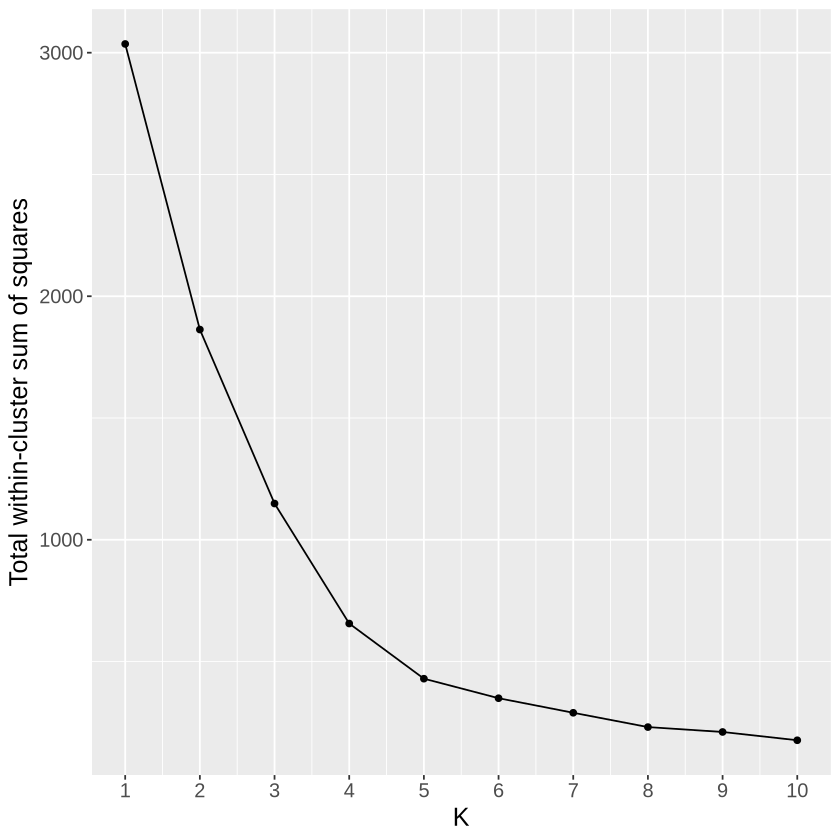

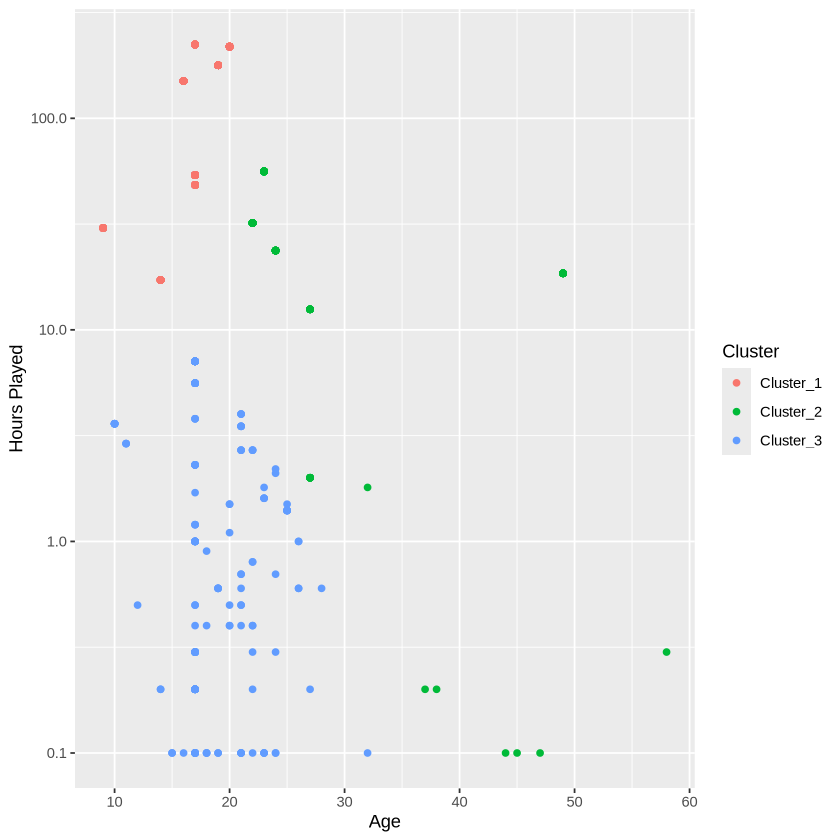

In [91]:
#Set seed for consistent reproduction 
set.seed(888)
#Plot size
options(repr.plot.width = 7, repr.plot.height = 7)

## Tune for best k##
total_played_clustdata <- sessions_players_elapsed |> 
    select(Age, played_hours) |> 
    filter(played_hours > 0) |>
     filter(!is.na(Age))

total_played_recipe <- recipe(~ ., total_played_clustdata) |>
    step_log(played_hours, base = 10) |>
    step_scale(all_predictors(), na_rm = TRUE) |>
    step_center(all_predictors(), na_rm = TRUE)

ks <- tibble(num_clusters = 1:10) 

player_spec_nstart <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 100)

elbow_stats <- workflow() |>
    add_recipe(total_played_recipe) |>
    add_model(player_spec_nstart) |>
    tune_cluster(resamples = apparent(total_played_clustdata), grid = ks) |>
    collect_metrics() |>
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)
    
elbow_plot <- elbow_stats |>
    ggplot(aes(x = num_clusters, y = total_WSSD)) +
    geom_point() +
    geom_line() +
    labs(x = "K",
        y = "Total within-cluster sum of squares") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(breaks = 1:10)

elbow_plot

## Clustering with Optimal K ##
total_played_clustering <- workflow() |>
    add_recipe(total_played_recipe) |>
    add_model(total_played_spec) |>
    fit(data = total_played_clustdata)

total_played_spec <- k_means(num_clusters = 3) |>
    set_engine("stats")

clustered_players <- augment(total_played_clustering, total_played_clustdata)

clustering_plot <- clustered_players |>
    ggplot(aes(x = Age, y = played_hours, color = .pred_cluster)) +
    geom_point() +
    labs(x = "Age",
        y = "Hours Played",
        color = "Cluster") +
    scale_y_log10()


clustering_plot